In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from matplotlib import colors
from scipy import stats
import statistics
from scipy.optimize import curve_fit
import pwlf


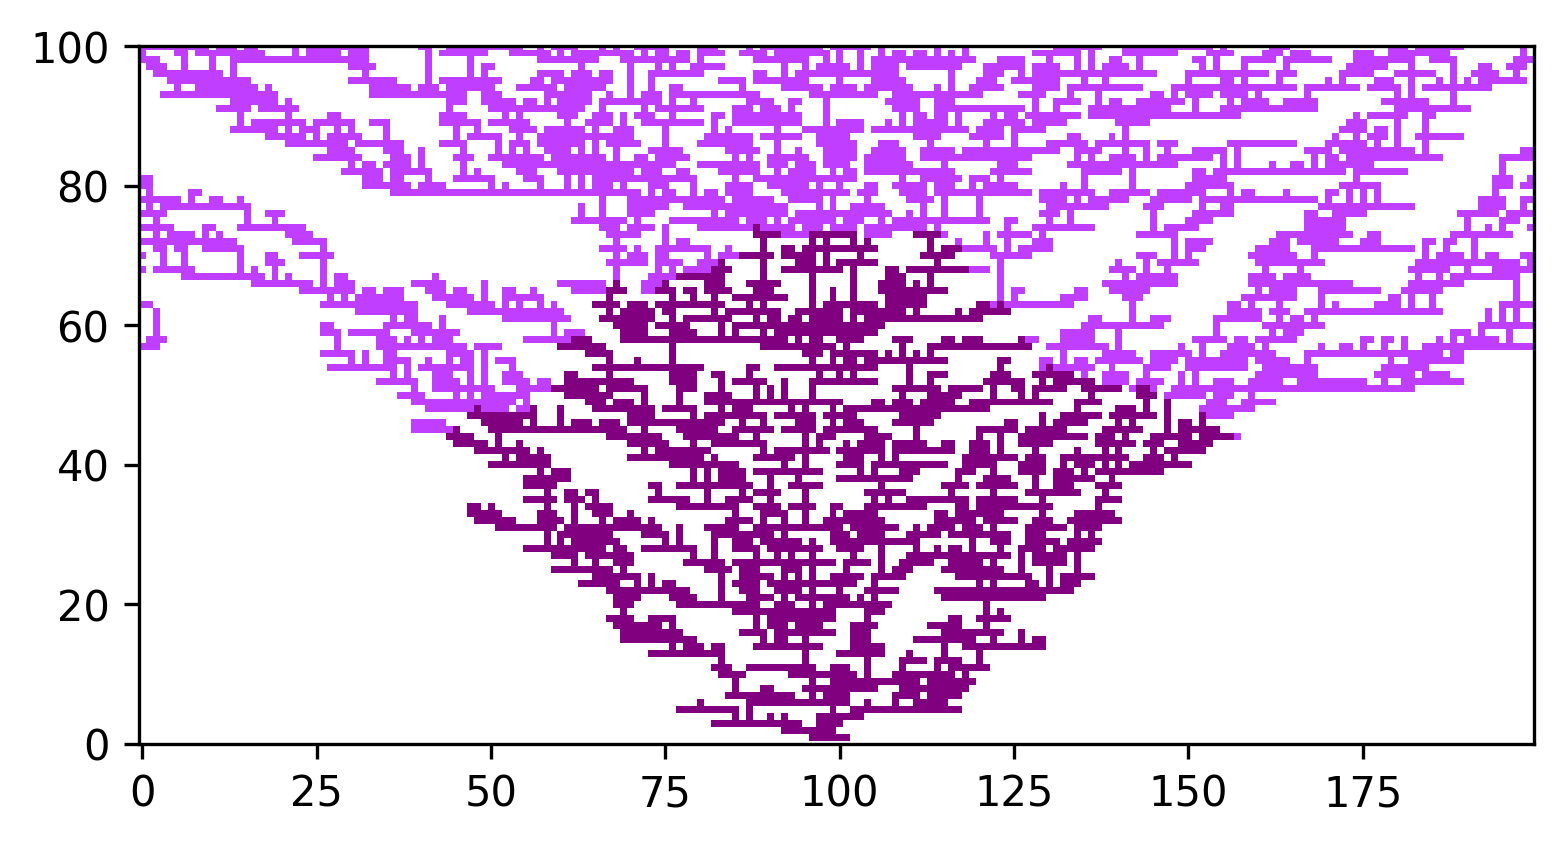

In [33]:
t = 50000
L = 200
h = np.zeros(L, dtype=int)
h.fill(-1000)                   #initializing the boundary conditions only letting the cell in the middle have a positive finite value=1
h[100] = 1
listoflength = np.zeros((t+1)) 
image_array = np.zeros((10000,200),dtype=int)

plt.figure(dpi=300)

def maxlength(arr,l):
    for i in range(l):
        if arr[i]>0:
            temp1 = i
            break
    for j in range(l):
        if arr[-j]>0:
            temp2 = 199-j
            break
    temp3 = temp2-temp1
    return(temp3)

colorlist = colors.ListedColormap(['white','purple','#BF3EFF','#A2CD5A','#F08080'])

for i in range(t):

    color_i = ((i//(t//4)))+1                                     #dedicating different colors fro, colorlist for each 2500 squares
    x = rnd.randint(0,199)                                      #choosing a random number betweeen 0 and 199 (h imdex goes from 0 to 199)
             
    if h[x-199] == h[x-200] and h[x-199] == h[x-198]:           #considering boundary conditions and letting the snowflakes sit in the lowest neighbor

        h[x-199] += 1
    elif h[x-199]>h[x-200] and h[x-199]>h[x-198]: 
        h[x-199] += 1 
    elif h[x-200] > h[x-198]:
        h[x-199] = h[x-200]
    elif h[x-200] < h[x-198]:
        h[x-199] = h[x-198]
    elif h[x-200] == h[x-198]:
        y = rnd.randint(0,1)
        if y == 0:
            h[x-199] = h[x-200]
        else:
            h[x-199] = h[x-198]
    
    listoflength[i] = maxlength(h,L)        
    image_array[h[x-199]][x-199] = color_i              #building an array of the cells where imshow functions is going to color.
      
plt.imshow(image_array , cmap = colorlist, interpolation='none', origin = 'lower' )   #coloring the specified cells in image_array with specified colors
   
    
ax = plt.gca()
ax.set_aspect(aspect=1)
plt.ylim(0, 100)
#plt.savefig('tree', dpi=300)
plt.show()   

In [47]:
listoflength.pop()

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

start and end x of fitted lines are:[  201.         20740.66363262 50000.        ]
the slopes fitted lines are:[1.06610130e+00 1.17979788e-08]
y of break point is[198.99999853]


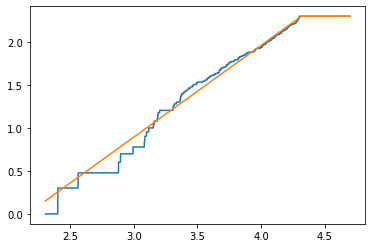

In [54]:
time= np.linspace(1,t+1,t+1)

tlog = [np.log10(time[i]) for i in range(200,t)]
listoflengthlog = [np.log10(listoflength[i]) for i in range(200,t)]
plt.plot(tlog,listoflengthlog)
ax = plt.gca()
#plt.xlim(0, t-1)

# initialize piecewise linear fit with tlog and meanofwlog
my_pwlf = pwlf.PiecewiseLinFit(tlog, listoflengthlog)

# fit the data for two line segments
res = my_pwlf.fit(2)

# predicting for the determined  break points
yHat = my_pwlf.predict(tlog)
plt.plot(tlog, yHat, "-")
breaks = my_pwlf.fit_breaks                 #finding where the new slope begins

print("start and end x of fitted lines are:" + str(10**(breaks)))
slopes = my_pwlf.calc_slopes()              #calculating the slopes
print("the slopes fitted lines are:" + str(slopes))
print( "y of break point is" + str(10**(my_pwlf.predict(breaks[1]))))

plt.savefig('variancelowsit2', dpi=300)

plt.show()

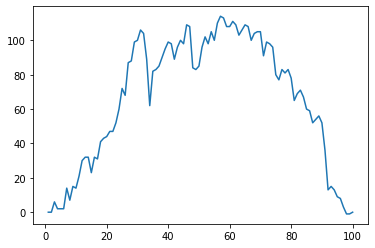

In [14]:
start_and_end = np.zeros((100,2))
length = np.zeros(100)
for i in range(100):
    for j in range(200):
        if image_array[i][j] != 0:
            start_and_end[i][0]= j
            break
for i in range(100):
    for j in range(200):
        if image_array[i][-j] != 0:
            start_and_end[i][1] = 199-j
            length[i] = start_and_end[i][1] - start_and_end[i][0]
            break
y = np.linspace(1,100,100)
plt.plot(y,length)